In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
df = pd.read_csv("HR.csv", low_memory=False)
df.shape

(1470, 35)

In [3]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
df.transpose().head(35)

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
Age,41,49,37,33,27,32,59,30,38,36,...,29,50,39,31,26,36,39,27,49,34
Attrition,Yes,No,Yes,No,No,No,No,No,No,No,...,No,Yes,No,No,No,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,...,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591,1005,1324,1358,216,1299,...,468,410,722,325,1167,884,613,155,1023,628
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,...,Research & Development,Sales,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,1,8,2,3,2,2,3,24,23,27,...,28,28,24,5,5,23,6,4,2,8
Education,2,1,2,4,1,2,3,1,3,3,...,4,3,1,3,3,2,1,3,3,3
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical,Life Sciences,Medical,Life Sciences,Life Sciences,Medical,...,Medical,Marketing,Marketing,Medical,Other,Medical,Medical,Life Sciences,Medical,Medical
EmployeeCount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EmployeeNumber,1,2,4,5,7,8,10,11,12,13,...,2054,2055,2056,2057,2060,2061,2062,2064,2065,2068


In [5]:
categorical_objects = ["BusinessTravel", "Department", "EducationField","JobRole","MaritalStatus","Gender"]
print(len(categorical_objects))


6


In [6]:
mapper = {'Yes': 0 , 'No': 1, 'Y':0, 'N':1 }
df = df.replace({'Attrition':mapper,"OverTime":mapper,"Over18":mapper })

In [7]:
df = pd.get_dummies(df, columns =categorical_objects, drop_first = True)
df.shape

(1470, 49)

In [8]:
y = df["Attrition"]
X = df.drop(["Attrition"], axis = 1)

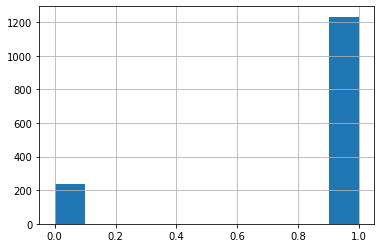

In [9]:
y.hist()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [11]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_pred = pd.DataFrame({'Prediction': y_pred})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C452720D0>]],
      dtype=object)

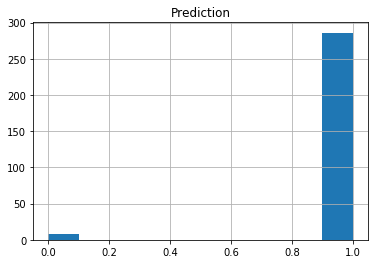

In [12]:
y_pred.hist()

In [13]:
from xgboost import XGBClassifier

In [14]:
xgb = XGBClassifier()

In [15]:
scores_rfc = cross_val_score(rfc, X, y, cv=5, scoring='roc_auc')
print(scores_rfc.mean())
scores_xgb = cross_val_score(xgb, X, y, cv=5, scoring='roc_auc')
print(scores_xgb.mean())

0.8130981467397153
0.8128062422249256


In [16]:
important_features_dict = {}
for x,i in enumerate(rfc.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

In [17]:
for i in range(20):
    print(str(i+1)+": "+X_train.columns[important_features_list[i]]+": "+str(important_features_dict[important_features_list[i]]))

1: MonthlyIncome: 0.06759960764027906
2: Age: 0.053188173332982994
3: TotalWorkingYears: 0.05009077605992429
4: DailyRate: 0.04876202438708292
5: OverTime: 0.04543175352483342
6: HourlyRate: 0.04523779814088932
7: EmployeeNumber: 0.044328087305042764
8: MonthlyRate: 0.043403986479806214
9: YearsAtCompany: 0.042085517173186544
10: DistanceFromHome: 0.04188706453599478
11: PercentSalaryHike: 0.03267661723014262
12: StockOptionLevel: 0.03142465926635514
13: NumCompaniesWorked: 0.029065348341506505
14: YearsWithCurrManager: 0.028979360245344782
15: YearsInCurrentRole: 0.027504448334166508
16: EnvironmentSatisfaction: 0.02669471534847638
17: JobSatisfaction: 0.025211867784003982
18: JobInvolvement: 0.02454748768535826
19: TrainingTimesLastYear: 0.024305344598682378
20: RelationshipSatisfaction: 0.022783803669872517


In [18]:
from tpot import TPOTClassifier

In [19]:
# tpot = TPOTClassifier(generations=1, population_size=50,scoring='roc_auc', verbosity=2,n_jobs=-1, warm_start=True)
# tpot.fit(X_train, y_train.values.ravel())